In [5]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar
from commonfunctions import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  # MLP is an NN
from sklearn import svm
import numpy as np
import argparse
import imutils  # If you are unable to install this library, ask the TA; we only need this in extract_hsv_histogram.
import cv2
import os
import random

from commonfunctions import *
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Depending on library versions on your system, one of the following imports 
from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:

def Dilation(img, window_size):
    
    output = np.zeros_like(img)
    for i in range(window_size//2, img.shape[0] - window_size//2):
        for j in range(window_size//2, img.shape[1] - window_size//2):
            output[i, j] = np.max(img[i-window_size//2:i+window_size//2+1, j-window_size//2:j+window_size//2+1] )
    return output
def erosion(img, window_size):
    frame=np.ones((window_size,window_size))
    output = np.zeros_like(img)
    for i in range(window_size//2, img.shape[0] - window_size//2):
        for j in range(window_size//2, img.shape[1] - window_size//2):
            output[i, j] = np.min(img[i-window_size//2:i+window_size//2, j-window_size//2:j+window_size//2])
    return output


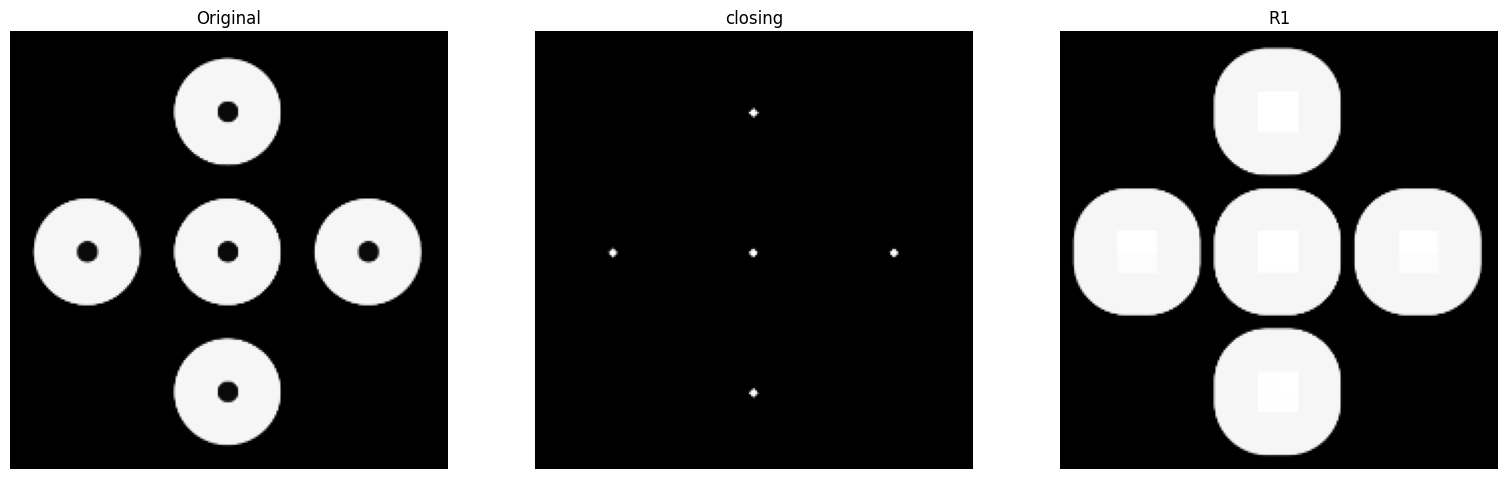

In [ ]:
#Q2

# Load the image
img = io.imread('./Q2.png')

#check if the image is RGB convert it to grayscale
if len(img.shape) == 3:
    img = rgb2gray(img)


R1 = Dilation(img,10)
closing=erosion(R1,47)
show_images([img, closing, R1], ['Original', 'closing', 'R1'])


In [ ]:
def HSV_image(image):
    hsv=rgb2hsv(image)
    show_images([image,hsv[:,:,0],hsv[:,:,1],hsv[:,:,2]],['Original','Hue','Saturation','Value'])
    return hsv


In [96]:

def histogram_eq1(img):
    modified_img = img.copy()
    H=np.zeros(256)
    for i in range(modified_img.shape[0]):
        for j in range(modified_img.shape[1]):
            H[modified_img[i][j][2]]+=1


    H_c = np.zeros(256)
    H_c[0]=H[0]
    for i in range(1,256):
        H_c[i]=H_c[i-1]+H[i]
    
    T=np.zeros(256)
    for i in range(256):
        T[i]=round((255*H_c[i])/(modified_img.shape[0]*modified_img.shape[1]))

    for i in range(modified_img.shape[0]):
        for j in range(modified_img.shape[1]):
            modified_img[i][j][2]=T[modified_img[i][j][2]]

    return modified_img




def histogram_eq(img):
    modified_img = img.copy()

    # calculate histogram
    H=np.zeros(256)
    for i in range(modified_img.shape[0]):
        for j in range(modified_img.shape[1]):
            H[modified_img[i][j]]+=1

    # calculate cumulative histogram
    H_c = np.zeros(256)
    H_c[0]=H[0]
    for i in range(1,256):
        H_c[i]=H_c[i-1]+H[i]
    
    # calculate transformation function
    T=np.zeros(256)
    for i in range(256):
        T[i]=round((255*H_c[i])/(modified_img.shape[0]*modified_img.shape[1]))

    # apply transformation
    for i in range(modified_img.shape[0]):
        for j in range(modified_img.shape[1]):
            modified_img[i][j]=T[modified_img[i][j]]
            
    return modified_img





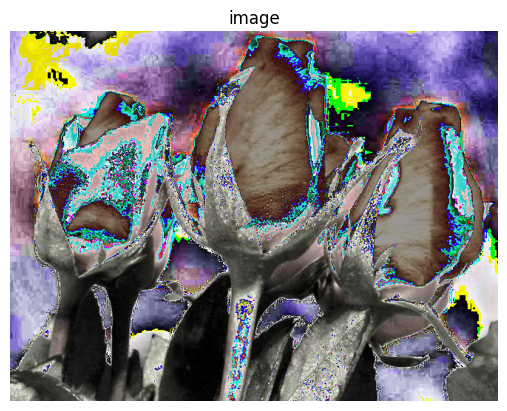

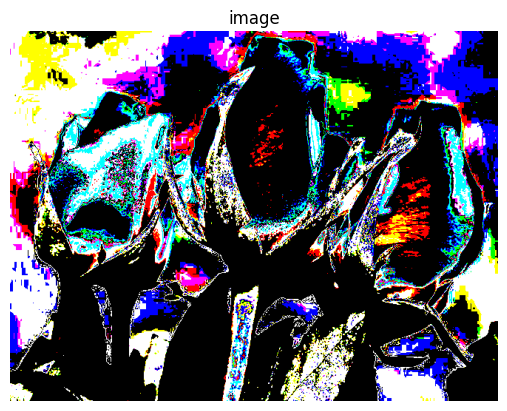

In [252]:
img3=io.imread('Q3.jpg')
img3=histogram_eq(img3)
show_images([img3],['image'])
# hide background
img3[img3<150]=0
img3[img3>=150]=255
show_images([img3],['image'])



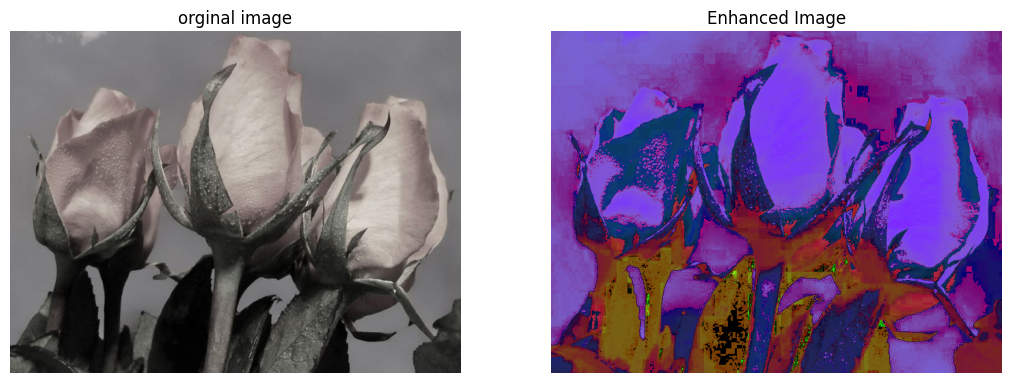

In [130]:
#get the hsv image enhanced_img
hsv=cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2HSV)

#increase the hue channel by 0.5 and saturation channel by 0.5 and value channel by 0.5
hsv[:,:,0]=hsv[:,:,0]
hsv[:,:,1]=hsv[:,:,1]
hsv[:,:,2]=hsv[:,:,2]
show_images([img3,hsv],['orginal image','Enhanced Image'])